In [5]:
import sys
sys.path.append('..')
%matplotlib inline
%load_ext autoreload
%autoreload 2
import os
import logging
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt

from ase import Atoms
from ase.io import read

from m_ff.configurations import carve_confs
from m_ff.models import TwoBodySingleSpeciesModel, ThreeBodySingleSpeciesModel, CombinedSingleSpeciesModel
from m_ff.calculators import TwoBodySingleSpecies, ThreeBodySingleSpecies, CombinedSingleSpecies

logging.basicConfig(level=logging.INFO)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Parameters

In [27]:
# Parameters
directory = Path('data/BIP_300/')
r_cut = 10.0
sigma_2b = 0.3
sigma_3b = 0.6
noise = 0.000000001

# GP Parameters
ntr = 10
ntest = 100
combine_2b_3b = True

# mapping
grid_start = 1.5
elementslist = [26]
num_2b = 1000
num_3b = 100

In [85]:
# # ----------------------------------------
# # Construct a configuration database
# # ----------------------------------------


n_data = 792*19

filename = directory / 'movie_energy.xyz'

traj = read(filename, index=slice(None), format='extxyz')

elements, confs, forces, energies = carve_confs(
    traj, r_cut, n_data,
    forces_label='force', energy_label='energy')

if not os.path.exists(directory):
    os.makedirs(directory)

np.save('{}/confs_cut={:.2f}.npy'.format(directory, r_cut), confs)
np.save('{}/forces_cut={:.2f}.npy'.format(directory, r_cut), forces)
np.save('{}/energies_cut={:.2f}.npy'.format(directory, r_cut), energies)

lens = [len(conf) for conf in confs]

logging.info('\n'.join((
    'Number of atoms in a configuration:',
    '   maximum: {}'.format(np.max(lens)),
    '   minimum: {}'.format(np.min(lens)),
    '   average: {:.4}'.format(np.mean(lens))
)))

INFO:root:Reading traj step 0
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 1
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 2
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 3
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 4
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 5
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 6
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 7
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 8
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 9
INFO:root:Energy in the xyz file is not pre

INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 48
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 49
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 50
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 51
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 52
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 53
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 54
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 55
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 56
INFO:root:Energy in the xyz file is not present, or is not calle

INFO:root:Reading traj step 95
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 96
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 97
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 98
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 99
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 100
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 101
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 102
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 103
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 104
INFO:root:Energy in the xyz 

INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 143
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 144
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 145
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 146
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 147
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 148
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 149
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 150
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 151
INFO:root:Energy in the xyz file is not present, or is 

INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 190
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 191
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 192
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 193
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 194
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 195
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 196
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 197
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 198
INFO:root:Energy in the xyz file is not present, or is 

INFO:root:Reading traj step 237
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 238
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 239
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 240
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 241
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 242
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 243
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 244
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 245
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 246
INFO:root:Energy in the

INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 285
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 286
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 287
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 288
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 289
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 290
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 291
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 292
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 293
INFO:root:Energy in the xyz file is not present, or is 

INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 332
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 333
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 334
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 335
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 336
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 337
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 338
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 339
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 340
INFO:root:Energy in the xyz file is not present, or is 

INFO:root:Reading traj step 379
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 380
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 381
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 382
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 383
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 384
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 385
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 386
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 387
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 388
INFO:root:Energy in the

INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 427
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 428
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 429
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 430
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 431
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 432
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 433
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 434
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 435
INFO:root:Energy in the xyz file is not present, or is 

INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 474
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 475
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 476
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 477
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 478
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 479
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 480
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 481
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 482
INFO:root:Energy in the xyz file is not present, or is 

INFO:root:Reading traj step 521
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 522
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 523
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 524
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 525
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 526
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 527
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 528
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 529
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 530
INFO:root:Energy in the

INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 569
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 570
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 571
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 572
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 573
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 574
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 575
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 576
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 577
INFO:root:Energy in the xyz file is not present, or is 

INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 616
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 617
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 618
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 619
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 620
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 621
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 622
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 623
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 624
INFO:root:Energy in the xyz file is not present, or is 

INFO:root:Reading traj step 663
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 664
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 665
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 666
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 667
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 668
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 669
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 670
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 671
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 672
INFO:root:Energy in the

INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 711
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 712
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 713
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 714
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 715
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 716
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 717
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 718
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 719
INFO:root:Energy in the xyz file is not present, or is 

INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 758
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 759
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 760
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 761
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 762
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 763
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 764
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 765
INFO:root:Energy in the xyz file is not present, or is not called energy
INFO:root:Reading traj step 766
INFO:root:Energy in the xyz file is not present, or is 

In [7]:
filename_energy = directory / 'energy.dat'
energies = np.loadtxt(filename_energy)[:,1]
np.save('{}/energies_cut={:.2f}.npy'.format(directory, r_cut), energies)

In [8]:
# Get configurations and forces from file
confs = np.load(directory / 'confs_cut={:.2f}.npy'.format(r_cut))
forces = np.load(directory / 'forces_cut={:.2f}.npy'.format(r_cut))
energies = np.load(directory / 'energies_cut={:.2f}.npy'.format(r_cut))

energies_divided = np.repeat(energies/(1+len(confs[0])), (1+len(confs[0])))
numconfs = len(forces)
ind = np.arange(numconfs)
ind_tot = np.random.choice(ind, size=ntr + ntest, replace=False)

# Separate into random testing and training dataset
# tr_confs, tr_forces = confs[ind[:ntr]], forces[ind[:ntr]]
# tst_confs, tst_forces = confs[ind[ntr:]], forces[ind[ntr:]]

# Use fixed training and testing dataset
tr_confs, tr_forces, tr_energies = confs[ind_tot[:ntr]], forces[ind_tot[:ntr]], energies_divided[ind_tot[:ntr]]
tst_confs, tst_forces, tst_energies = confs[ind_tot[ntr:]], forces[ind_tot[ntr:]], energies_divided[ind_tot[ntr:]]

## GP 2-body

In [74]:
model_2b = TwoBodySingleSpeciesModel(elementslist[0], r_cut, sigma_2b, r_cut / 10.0, noise)
model_2b.fit_energy(tr_confs, tr_energies)

INFO:m_ff.kernels.twobody:Started compilation of theano two body single species kernels
INFO:m_ff.kernels.twobody:Ended compilation of theano two body single species kernels


In [75]:
# Test the GP performance
print('Testing GP')

gp_energies = np.zeros(ntest)
gp_error = np.zeros(ntest)

for i in np.arange(ntest):
    gp_energies[i] = model_2b.predict_energy(np.reshape(tst_confs[i], (1, len(tst_confs[i]), 5)))
    gp_error[i] = gp_energies[i] - tst_energies[i]

MAE = np.mean(np.abs(gp_error))
SMAE = np.std(np.abs(gp_error))

ME = np.mean(np.abs(tst_energies - np.mean(tst_energies)))

print('MAE on energies: {:.4f} +- {:.4f}'.format(MAE, SMAE))
print('Relative MAE on energies: {:.4f} +- {:.4f}'.format(MAE / ME, SMAE / ME))

Testing GP
MAE on energies: 0.0054 +- 0.0037
Relative MAE on energies: 1.0688 +- 0.7351


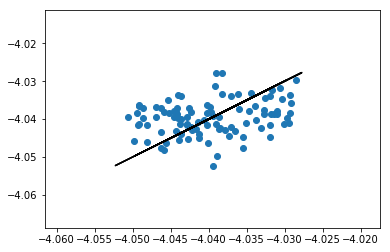

In [76]:
plt.scatter(tst_energies, gp_energies)
plt.plot(gp_energies, gp_energies, 'k-')
plt.show()

## GP 3-body

In [20]:
model_3b = ThreeBodySingleSpeciesModel(elementslist[0], r_cut, sigma_2b, r_cut / 10.0, noise)
model_3b.fit_energy(tr_confs, tr_energies)

INFO:m_ff.kernels.threebodykernel:Started compilation of theano three body kernels
INFO:m_ff.kernels.threebodykernel:Ended compilation of theano three body kernels


In [21]:
# Test the GP performance
print('Testing GP')

gp_energies = np.zeros(ntest)
gp_error = np.zeros(ntest)

for i in np.arange(ntest):
    gp_energies[i] = model_3b.predict_energy(np.reshape(tst_confs[i], (1, len(tst_confs[i]), 5)))
    gp_error[i] = gp_energies[i] - tst_energies[i]

MAE = np.mean(np.abs(gp_error))
SMAE = np.std(np.abs(gp_error))

ME = np.mean(np.abs(tst_energies - np.mean(tst_energies)))

print('MAE on energies: {:.4f} +- {:.4f}'.format(MAE, SMAE))
print('Relative MAE on energies: {:.4f} +- {:.4f}'.format(MAE / ME, SMAE / ME))

Testing GP
MAE on energies: 0.0113 +- 0.0104
Relative MAE on energies: 2.8279 +- 2.6078


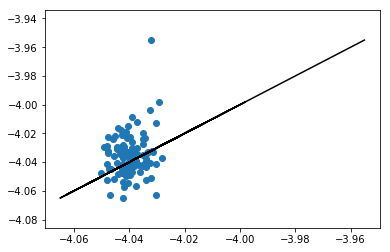

In [22]:
plt.scatter(tst_energies, gp_energies)
plt.plot(gp_energies, gp_energies, 'k-')
plt.show()

## GP 2-body - forces

In [29]:
model_2b = TwoBodySingleSpeciesModel(elementslist[0], r_cut, sigma_2b, r_cut / 10.0, noise)
model_2b.fit(tr_confs, tr_forces)

INFO:m_ff.kernels.twobody:Started compilation of theano two body single species kernels
INFO:m_ff.kernels.twobody:Ended compilation of theano two body single species kernels
